In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Your friend Wenceslao wants to sell his house. He's heard you've become a
counselor to the spanish government and has asked you for advice.
He'd like to know how valuable his house is.

Source of the data:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [61]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeOp-tech/EDA/master/datasets/housing.csv?token=AHM3F3FY6FRX3VJS6LQ7FWLAN37GK")
print(data.shape)
data.head()

(1459, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
data.set_index(['Id'],inplace=True)
data

### Do exploratory data analysis (EDA)

In [65]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [99]:
print(data.columns[data.dtypes!=object].shape)
print(data.columns[data.dtypes!=object])
print(data.columns[data.dtypes==object].shape)
print(data.columns[data.dtypes==object])

(37,)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
(43,)
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heati

In [87]:
data.select_dtypes(exclude=[object])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


<ipython-input-96-97ca7ccad4a2>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax_ = data.select_dtypes(exclude=[object]).hist(ax=ax)


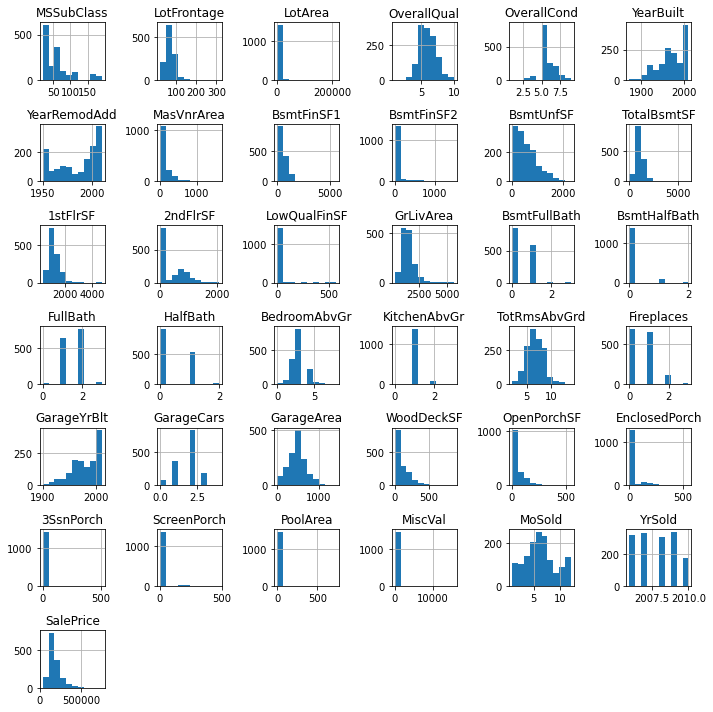

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
ax_ = data.select_dtypes(exclude=[object]).hist(ax=ax)
plt.tight_layout()

<AxesSubplot:>

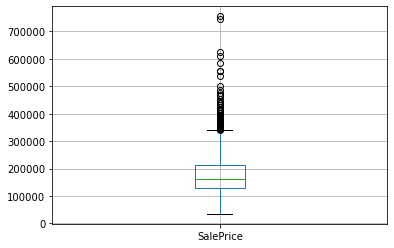

In [106]:
data.boxplot('SalePrice')

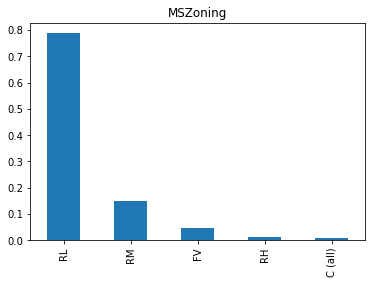

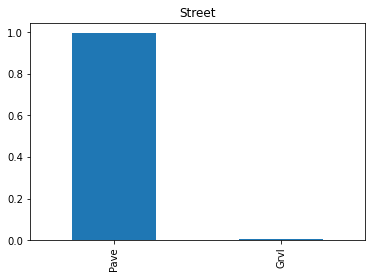

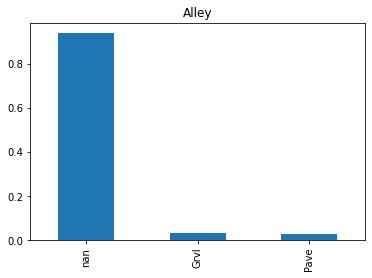

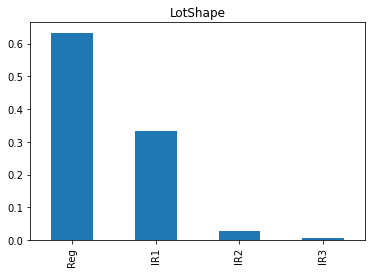

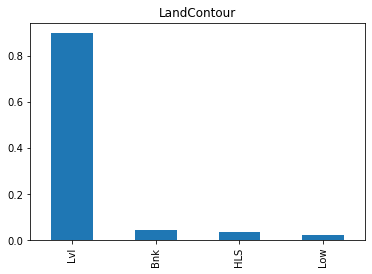

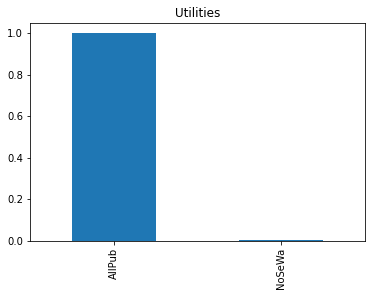

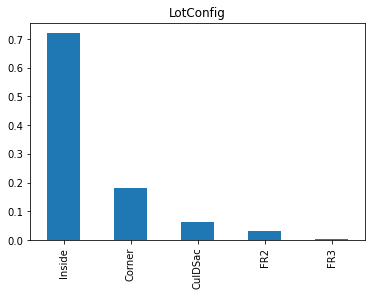

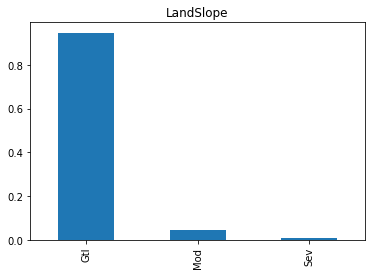

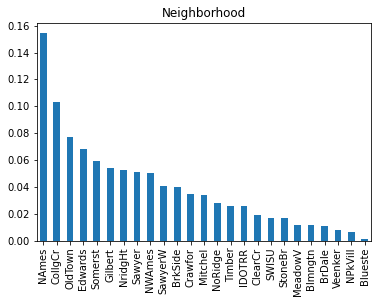

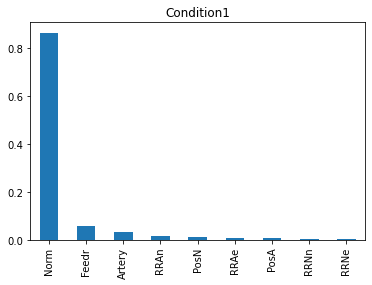

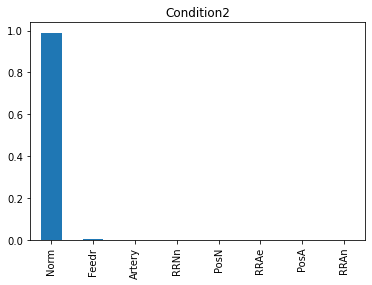

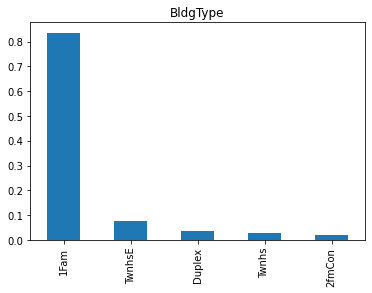

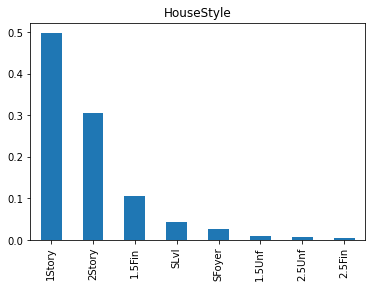

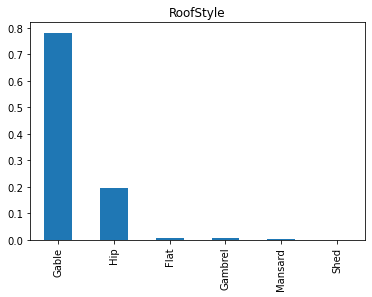

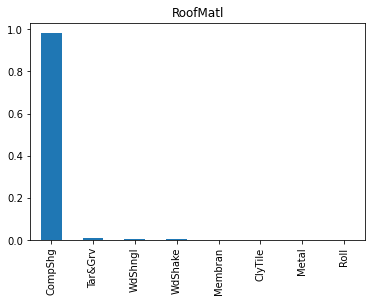

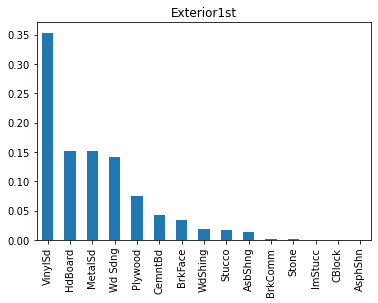

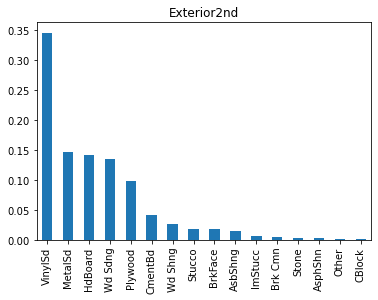

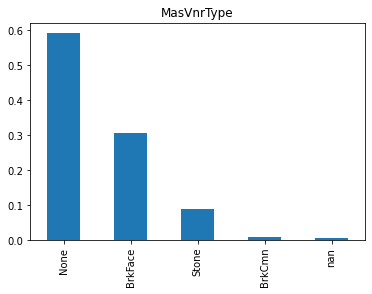

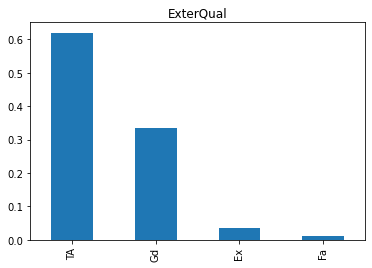

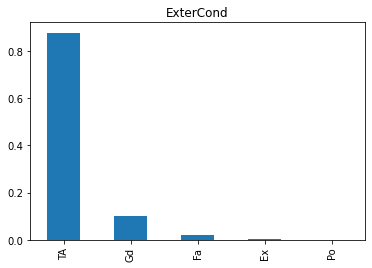

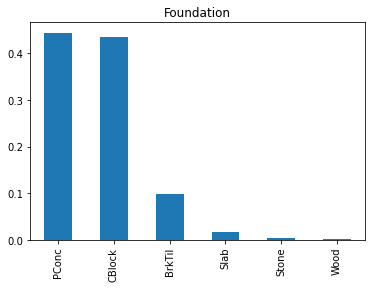

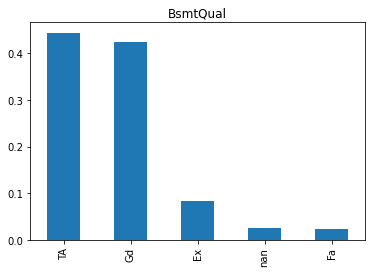

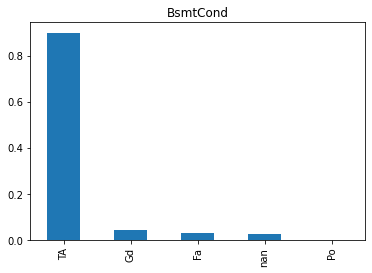

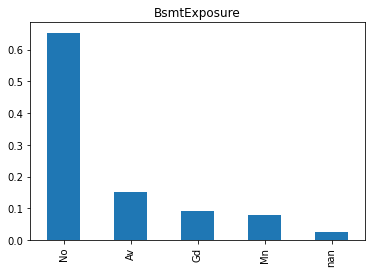

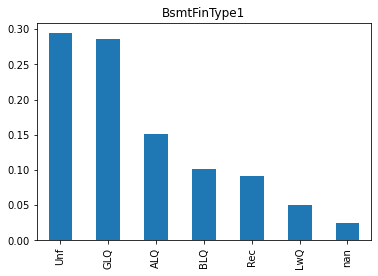

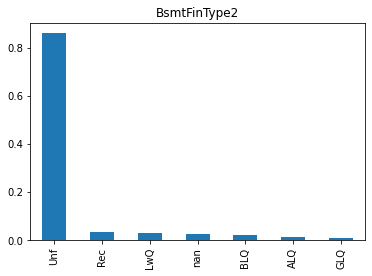

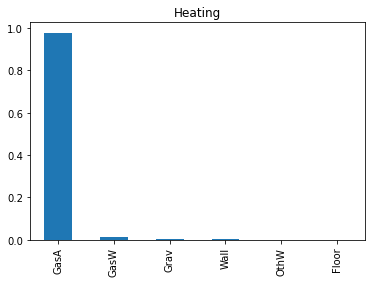

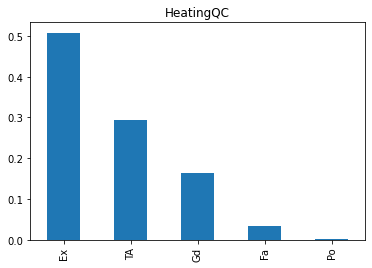

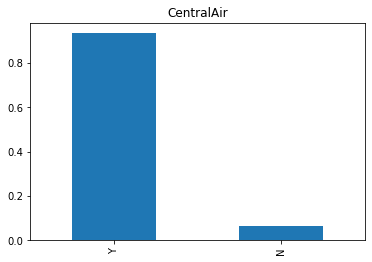

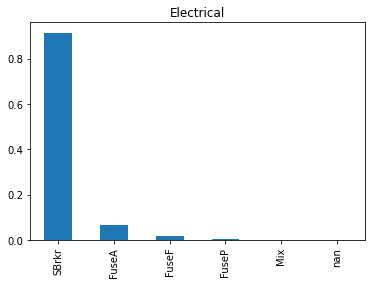

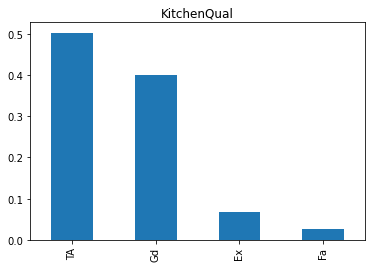

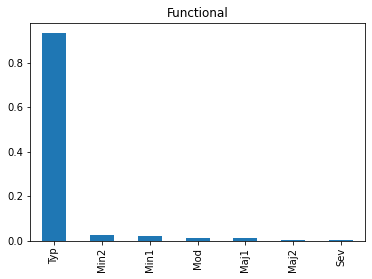

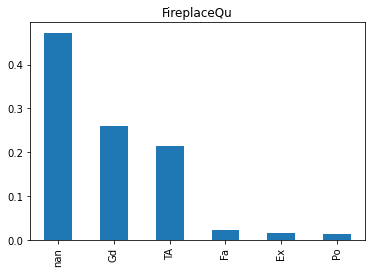

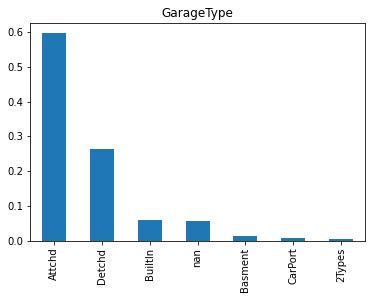

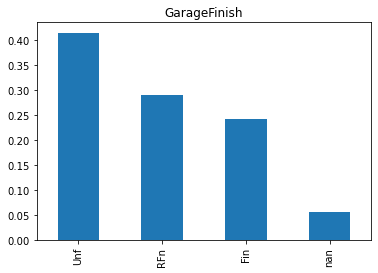

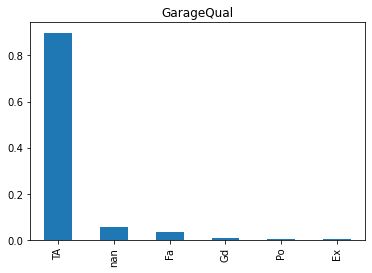

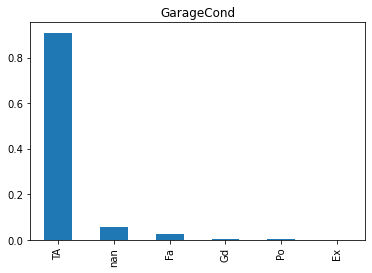

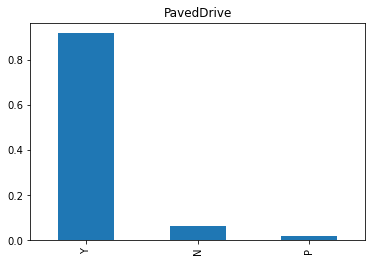

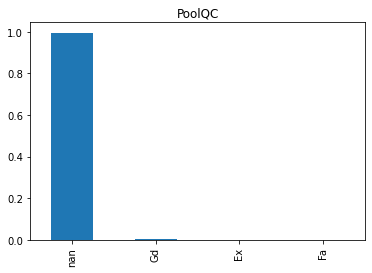

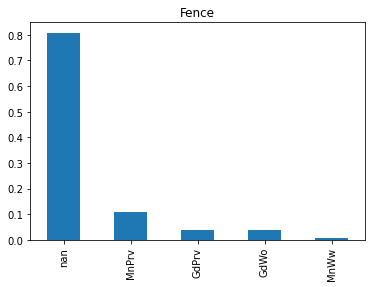

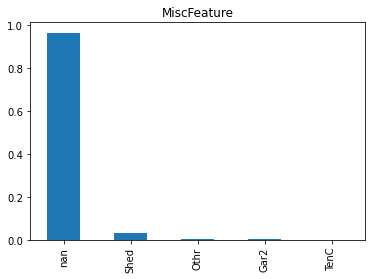

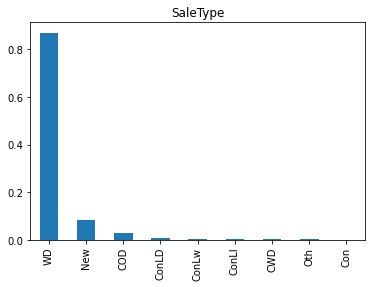

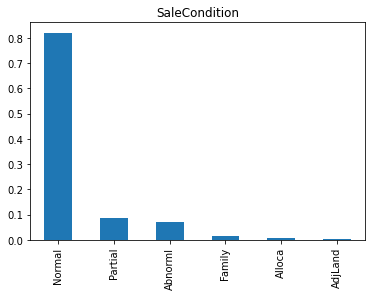

In [117]:
for colnames in data.columns[data.dtypes==object]:
    data[colnames].value_counts(normalize=True,dropna=False).plot(kind='bar',title=colnames)
    plt.show()

In [114]:
data.corr()*100

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,100.000000,-38.637141,-13.976340,3.262003,-5.916909,2.768793,4.067089,2.287427,-6.996787,-6.568332,...,-1.266602,-0.610129,-1.207744,-4.383816,-2.606127,0.827512,-0.751883,-1.351714,-2.131332,-8.440782
LotFrontage,-38.637141,100.000000,42.614591,25.163918,-5.910293,12.331398,8.895745,19.342627,23.362075,4.987248,...,8.846412,15.197330,1.066240,7.001865,4.135619,20.616118,0.382169,1.126602,0.754645,35.181820
LotArea,-13.976340,42.614591,100.000000,10.581622,-0.592105,1.445640,1.369857,10.424585,21.429796,11.121064,...,17.182793,8.477605,-1.829541,2.043784,4.319606,7.768209,3.790587,0.112679,-1.437806,26.403129
OverallQual,3.262003,25.163918,10.581622,100.000000,-9.197505,57.280645,55.082252,41.189631,23.969627,-5.913470,...,23.893311,30.881889,-11.395979,3.036503,6.487479,6.516268,-3.135617,7.085523,-2.731029,79.115529
OverallCond,-5.916909,-5.910293,-0.592105,-9.197505,100.000000,-37.442613,7.277797,-12.746478,-4.486488,4.072792,...,-0.221405,-3.262709,7.101183,2.571949,5.530570,-0.188540,6.665973,-0.444623,4.269838,-7.666761
YearBuilt,2.768793,12.331398,1.445640,57.280645,-37.442613,100.000000,59.440549,31.538596,24.869725,-4.949311,...,22.426989,18.886095,-38.808679,3.125015,-5.073033,0.487461,-3.266620,1.313580,-1.259543,52.251723
YearRemodAdd,4.067089,8.895745,1.369857,55.082252,7.277797,59.440549,100.000000,17.996357,12.900523,-6.762783,...,20.618194,22.634437,-19.378283,4.535285,-3.861228,0.586499,-1.106378,2.118464,3.531106,50.778218
MasVnrArea,2.287427,19.342627,10.424585,41.189631,-12.746478,31.538596,17.996357,100.000000,26.446878,-7.244343,...,15.946998,12.571468,-11.036304,1.875167,6.136705,1.169721,-2.924165,-0.572010,-0.785205,47.732586
BsmtFinSF1,-6.996787,23.362075,21.429796,23.969627,-4.486488,24.869725,12.900523,26.446878,100.000000,-5.032767,...,20.391021,11.179025,-10.258077,2.638160,6.186204,14.049129,0.459391,-1.531987,1.496273,38.605500
BsmtFinSF2,-6.568332,4.987248,11.121064,-5.913470,4.072792,-4.949311,-6.762783,-7.244343,-5.032767,100.000000,...,6.776459,0.309068,3.647490,-3.001741,8.882255,4.169672,0.524590,-1.509032,3.189172,-1.155829


<AxesSubplot:>

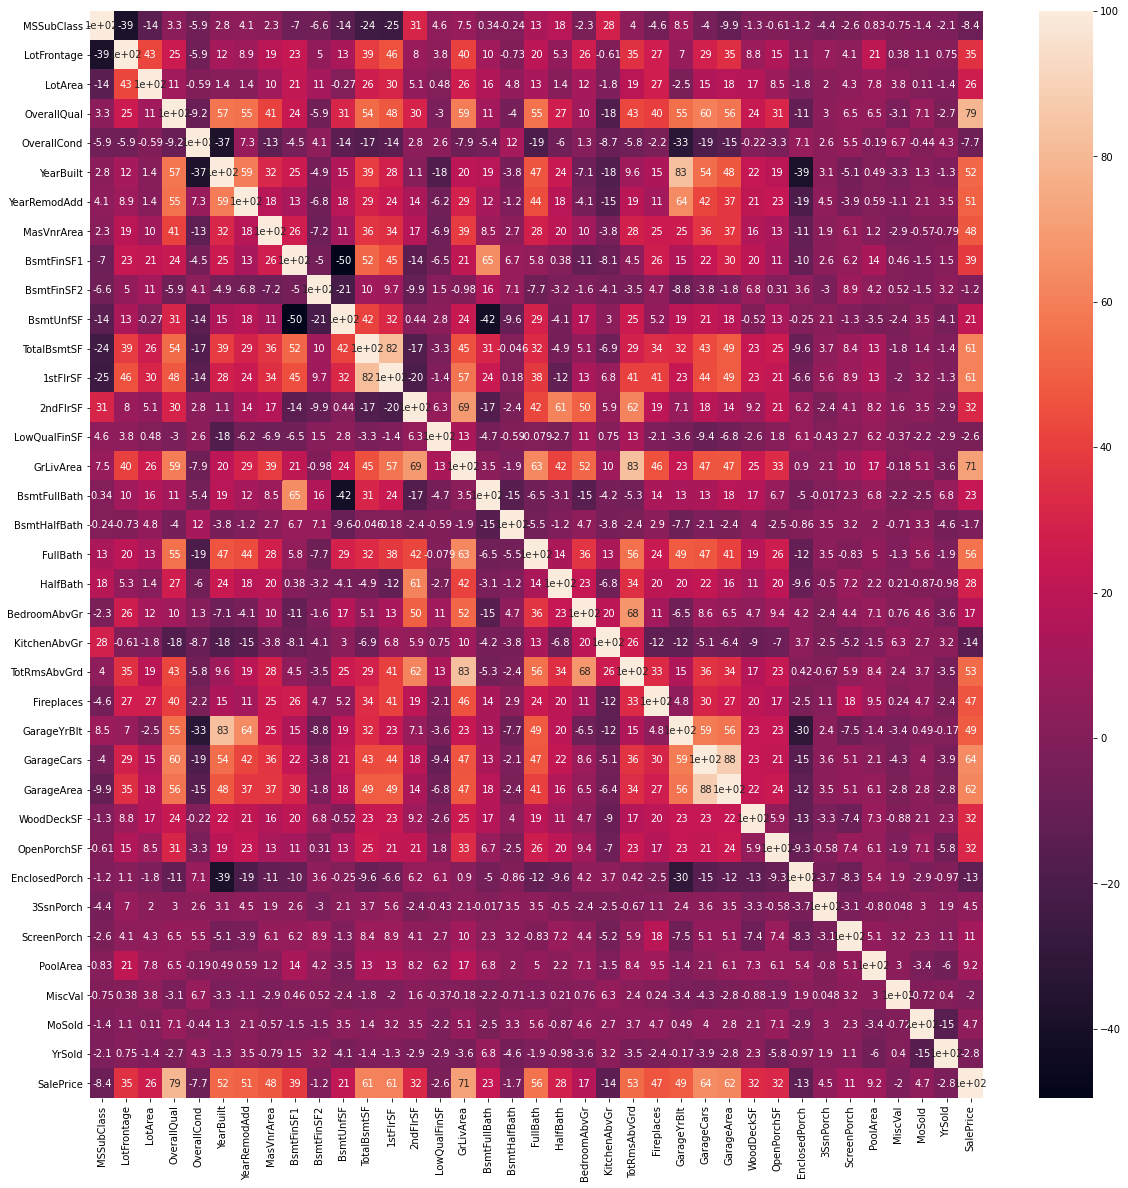

In [125]:
df = data.corr()
figure(figsize=(20, 20))
sns.heatmap(df, annot=True)